In [9]:
import numpy as np
import mySDC

### Secion 2 Crouseilles Lawson for Dahlquist eq.

$$u_t = \lambda_1u + \lambda_2u \equiv Au + F(u)$$
$$|\lambda_1| >> |\lambda_2|$$

var. change: $$v = e^{-tA}u(t) \equiv e^{-t\lambda_1}u(t) $$

$$v_t = e^{-tA}F(e^{tA}v(t)) \equiv \lambda_2 v(t) = f(v)$$

In [10]:
l1, l2 = 0. + 10.j, -0.03j
t0 = 0.0
u0 = 1.0 + 0.j
steps = 101 # t=0. -> t=1.

t = np.zeros((steps))
timestep = 0.01

u = np.zeros((steps), dtype=np.cfloat)
uv = np.zeros((steps), dtype=np.cfloat)

# var change
v0 = u0 * np.exp(-t0*l1) # === 1.0

# rhs for v
def fv(t, v):
    return l2 * v

# rhs for u
def fu(t, u):
    return (l1 + l2) * u

### Lawson-RK45 and direct RK45

max error Lawson-RK 1.84142347338595e-15
max error RK 2.737473270531057e-08


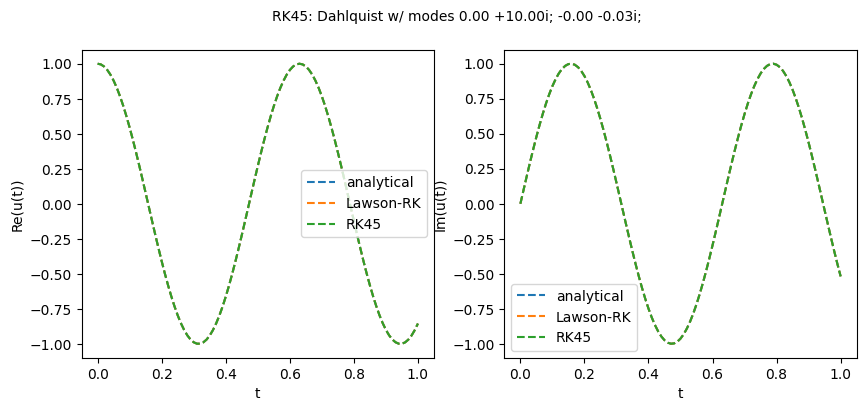

In [11]:
import scipy

# RK45(u) and Lawson-RK45(v) integrators
v_integ = scipy.integrate.RK45(fv, t0, [v0], 100., first_step=timestep, max_step=timestep)
u_integ = scipy.integrate.RK45(fu, t0, [u0], 100., first_step=timestep, max_step=timestep)

for i in range(steps):
    t[i] = v_integ.t
    uv[i] = v_integ.y * (np.exp(v_integ.t*l1) + 0.j)
    v_integ.step()
    u[i] = u_integ.y
    u_integ.step()

print("max error Lawson-RK", np.max(np.abs(uv - np.exp((l1 + l2)*t))))
print("max error RK", np.max(np.abs(u - np.exp((l1 + l2)*t))))

mySDC.plot_solutions("RK45", [l1, l2], ["analytical", "Lawson-RK", "RK45"], [np.exp((l1 + l2)*t), uv, u], t)

### Lawson Euler-SDC (Buvoli 2.2)

max error no sweeps 9.069412961973004e-07
max error 1 sweeps 2.983844616901741e-11
max error 2 sweeps 5.864510770293589e-15
max error 3 sweeps 2.5559253454202264e-15
max error 4 sweeps 2.5559253454202264e-15
max error 5 sweeps 2.5559253454202264e-15
max error 6 sweeps 2.5559253454202264e-15


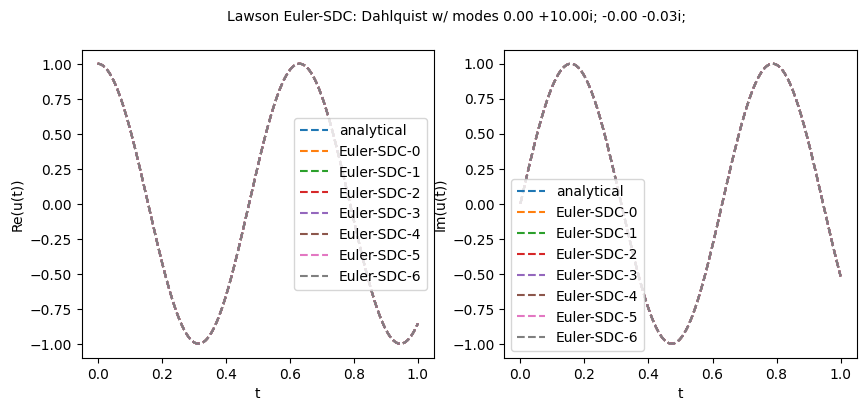

In [12]:
uv0 = u0 # * np.exp(-t0*l1) === 1.0

N = 6

fv = lambda t, x : x * l2

tau, uv_sdc_0 = mySDC.Euler_SDC(N, 0, t, uv0, [fv])
exptl1 = np.exp(tau * l1) + 0.j # Lawson v -> u change of variable
analytical = np.exp((l1 + l2)*tau)

M_max = 7
uv_sdc = [analytical, uv_sdc_0 * exptl1]
plot_names = ["analytical", "Euler-SDC-0"]
print("max error no sweeps", np.max(np.abs(uv_sdc_0 * exptl1 - analytical)))


for M in range(1, M_max):
    _, uv = mySDC.Euler_SDC(N, M, t, uv0, [fv])
    uv_sdc.append(uv * exptl1)
    plot_names.append("Euler-SDC-" + str(M))
    print("max error " + str(M) + " sweeps", np.max(np.abs(uv * exptl1 - analytical)))

# plot solution
mySDC.plot_solutions("Lawson Euler-SDC", [l1, l2], plot_names, uv_sdc, tau)

max error no sweeps 0.05694934343393235
max error 1 sweeps 0.00033388446667880417
max error 2 sweeps 2.0922939400767157e-06
max error 3 sweeps 1.3408530935263632e-08
max error 4 sweeps 8.71019338130095e-11
max error 5 sweeps 5.718326958295711e-13
max error 6 sweeps 2.24344731046363e-14


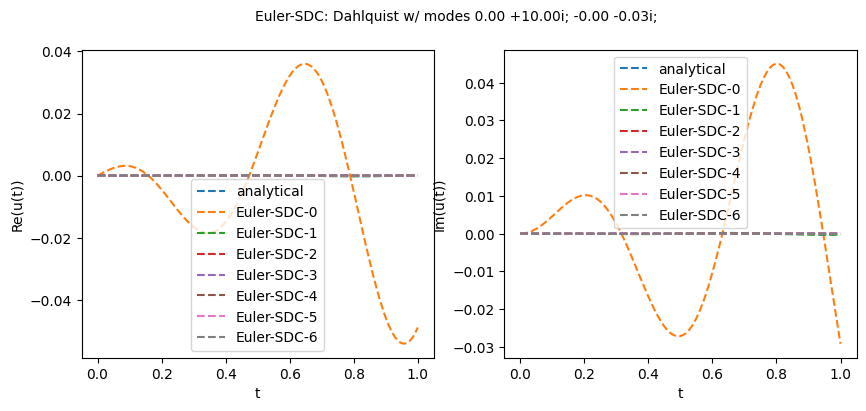

In [13]:
N = 11

def fu(t, u):
    return (l1 + l2) * u

tau, u_sdc_0 = mySDC.Euler_SDC(N, 0, t, u0, [fu])
analytical = np.exp((l1 + l2)*tau)

M_max = 7
u_sdc = [analytical, u_sdc_0]
plot_names = ["analytical", "Euler-SDC-0"]
print("max error no sweeps", np.max(np.abs(u_sdc_0 - analytical)))

for M in range(1, M_max):
    _, u = mySDC.Euler_SDC(N, M, t, u0, [fu])
    u_sdc.append(u)
    plot_names.append("Euler-SDC-" + str(M))
    print("max error " + str(M) + " sweeps", np.max(np.abs(u - analytical)))

# plot solution
mySDC.plot_solutions("Euler-SDC", [l1, l2], plot_names, u_sdc - analytical, tau)

### ETD-SDC (Buvoli 2.3)

$$u_t = \lambda_1u + \lambda_2u \equiv \Lambda u + N(u)$$
$$|\lambda_1| >> |\lambda_2|$$

$$\Lambda = \lambda_1; N(\cdot) = \lambda_2*$$

max error no sweeps 0.00025961038644097136
max error 2 sweeps 2.1803796582642334e-13
max error 3 sweeps 8.484312441289354e-15
max error 4 sweeps 8.484312441289354e-15
max error 5 sweeps 8.484312441289354e-15
max error 6 sweeps 8.484312441289354e-15


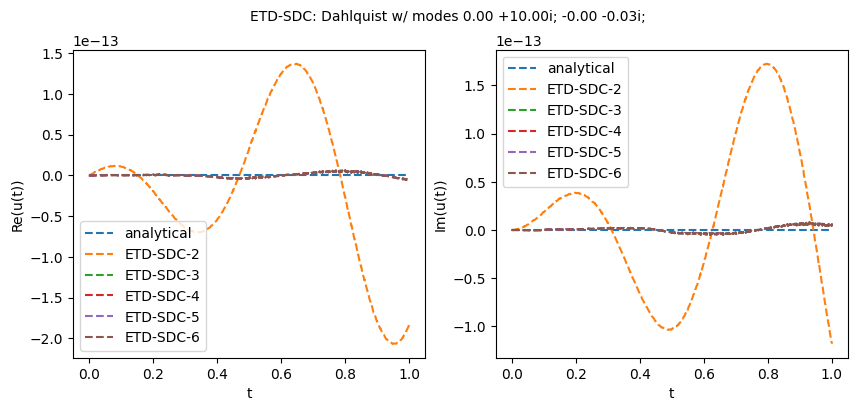

In [14]:
l1, l2 = 0. + 10.j, -0.03j
N = 7
fn = lambda x : l2 * x

tau, u_sdc_0 = mySDC.ETDSDC(N, 0, t, u0, [l1, fn])
analytical = np.exp((l1 + l2)*tau)

M_max = 7
u_sdc = [analytical]
plot_names = ["analytical"]
print("max error no sweeps", np.max(np.abs(u_sdc_0 - analytical)))


for M in range(2, M_max):
    _, u = mySDC.ETDSDC(N, M, t, u0, [l1, fn])
    u_sdc.append(u)
    plot_names.append("ETD-SDC-" + str(M))
    print("max error " + str(M) + " sweeps", np.max(np.abs(u - analytical)))

# plot solution
mySDC.plot_solutions("ETD-SDC", [l1, l2], plot_names, u_sdc - analytical, tau)

# N = 3
# l1, l2 = 0. + 10.j, -0.1j

### IMEX-SDC (Buvoli 2.4)

max error no sweeps 0.05419625296515227
max error 1 sweeps 0.0003376228842784136
max error 2 sweeps 2.1288190524780602e-06
max error 3 sweeps 1.373548406143097e-08
max error 4 sweeps 8.988741660039529e-11
max error 5 sweeps 5.941454336168387e-13
max error 6 sweeps 1.3615969986695103e-14


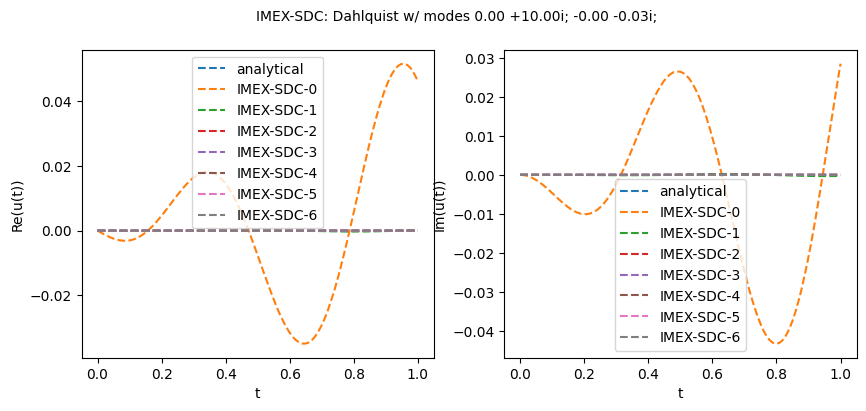

In [17]:
fn = lambda x : x * l2

M_max = 7
N = 11
tau, u_sdc_0 = mySDC.IMEXSDC(N, 0, t, u0, [l1, fn])
analytical = np.exp((l1 + l2)*tau)

u_sdc = [analytical, u_sdc_0]
plot_names = ["analytical", "IMEX-SDC-0"]
print("max error no sweeps", np.max(np.abs(u_sdc_0 - analytical)))

for M in range(1, M_max):
    _, u = mySDC.IMEXSDC(N, M, t, u0, [l1, fn])
    u_sdc.append(u)
    plot_names.append("IMEX-SDC-" + str(M))
    print("max error " + str(M) + " sweeps", np.max(np.abs(u - analytical)))

# plot solution
mySDC.plot_solutions("IMEX-SDC", [l1, l2], plot_names, u_sdc - analytical, tau)